# 出版商统计

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 读取 Excel 文件
df = pd.read_excel("/Users/linzuhong/学习文件/3-博/博三/MOF_llm/statedemo/springermerged_result.xlsx")

# 按 "Publication_Year" 分组，统计每个年份出现的次数
df_count = df.groupby("Publication_Year")["Publication_Year"].count().reset_index(name="count")
df_count = df_count.sort_values("Publication_Year")

# ------------------ 设置风格：模仿 ggplot2 的 theme_bw() ------------------ #
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.edgecolor": "black",     # 坐标轴边框颜色
    "axes.linewidth": 1.0,         # 坐标轴线宽
    "axes.facecolor": "white",     # 坐标轴背景色
    "grid.color": "gray",          # 网格线颜色
    "grid.alpha": 0.2,             # 更浅的网格线透明度
    "grid.linestyle": "-",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.size": 12,
    "figure.facecolor": "white",
})
sns.set_context("notebook", font_scale=1.2)

# ------------------ 准备数据 ------------------ #
x = df_count["Publication_Year"].values
y = df_count["count"].values

norm = plt.Normalize(y.min(), y.max())
cmap = sns.color_palette("GnBu", as_cmap=True)

# ------------------ 绘图 ------------------ #
# figsize=(10, 3) 让图更宽、更矮，看起来更扁
fig, ax = plt.subplots(figsize=(10, 3))

# 循环遍历相邻点，分别绘制每段折线和填充
for i in range(len(x) - 1):
    xi = [x[i], x[i+1]]
    yi = [y[i], y[i+1]]
    
    avg_val = (y[i] + y[i+1]) / 2.0
    color = cmap(norm(avg_val))
    
    ax.plot(xi, yi, color=color, linewidth=3)
    ax.fill_between(xi, 0, yi, color=color, alpha=0.4)

ax.set_xlabel("Publication Year", fontsize=20) #
ax.set_ylabel("Count", fontsize=20)
ax.tick_params(axis='x', labelsize=18)  # x 轴刻度文字大小
ax.tick_params(axis='y', labelsize=18)  # y 轴刻度文字大小

# ------------------ 统一横坐标从 1995 年开始 ------------------ #
min_year = 1995
max_year = 2016 #int(df_count["Publication_Year"].max()) #2016

# 设置 X 轴范围
ax.set_xlim(min_year, max_year)

# 每隔 5 年一个刻度
xticks = np.arange(min_year, max_year + 1, 5)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

plt.tight_layout()

# ------------------ 保存至 PDF 文件 ------------------ #
plt.savefig("/Users/linzuhong/学习文件/3-博/博三/MOF_llm/statedemo/springer.pdf", 
            format="pdf", dpi=300)

plt.show()

# 前十期刊

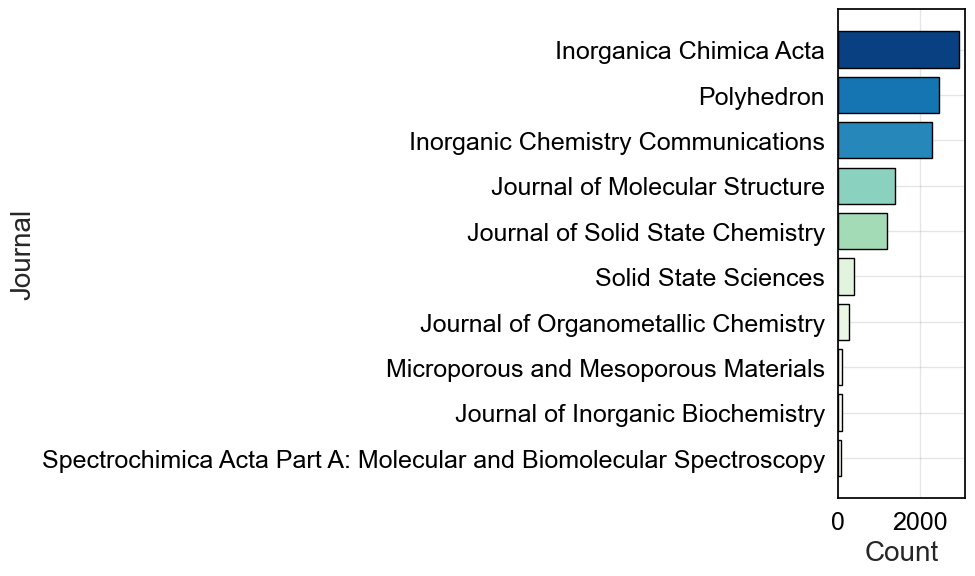

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize

# ------------------ 设置风格 ------------------ #
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.edgecolor": "black",     
    "axes.linewidth": 1.0,         
    "axes.facecolor": "white",     
    "grid.color": "gray",          
    "grid.alpha": 0.2,             
    "grid.linestyle": "-",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.size": 12,
    "figure.facecolor": "white",
})
sns.set_context("notebook", font_scale=1.2)

# 使用 GnBu 渐变色调色板
cmap = sns.color_palette("GnBu", as_cmap=True)

# ------------------ 读取数据 ------------------ #
file_path = "/Users/linzuhong/学习文件/3-博/博三/MOF_llm/statedemo/elsevierfrequency_counts.xlsx"
df = pd.read_excel(file_path)

# 按 "Frequency" 降序排序，并只取前 10 行
df = df.sort_values("count", ascending=False).head(10)

# 提取类别与数值
categories = df["Journal"].values
values = df["count"].values

# 创建颜色映射：根据数值分配颜色
norm = plt.Normalize(values.min(), values.max())
bar_colors = [cmap(norm(val)) for val in values]

# ------------------ 绘制横向柱状图 ------------------ #
plt.figure(figsize=(10, 6))
plt.barh(categories, values, color=bar_colors, edgecolor='black')
plt.xlabel("Count", fontsize=20)
plt.ylabel("Journal", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 反转 y 轴，使得最大值显示在上方
plt.gca().invert_yaxis()

plt.tight_layout()

# 保存为 PDF 格式
plt.savefig("/Users/linzuhong/学习文件/3-博/博三/MOF_llm/statedemo/elseviercrystal_system_stats_top10.pdf",
            format="pdf", dpi=300)

plt.show()

# 晶体系统统计

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ------------------ 设置风格 ------------------ #
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.edgecolor": "black",     # 坐标轴边框颜色
    "axes.linewidth": 1.0,         # 坐标轴线宽
    "axes.facecolor": "white",     # 坐标轴背景色
    "grid.color": "gray",          # 网格线颜色
    "grid.alpha": 0.2,             # 更浅的网格线透明度
    "grid.linestyle": "-",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.size": 12,
    "figure.facecolor": "white",
})
sns.set_context("notebook", font_scale=1.2)

# 使用 GnBu 渐变色调色板
cmap = sns.color_palette("GnBu", as_cmap=True)

# ------------------ 读取数据 ------------------ #
file_path = "/Users/linzuhong/学习文件/3-博/博三/MOF_llm/statedemo/crystal_system_stats.xlsx"
df = pd.read_excel(file_path)

# 按 "Frequency" 降序排序（保证最大值在前面）
df = df.sort_values("Frequency", ascending=False)

# 提取类别与数值
categories = df["Crystal System"].values
values = df["Frequency"].values

# 创建颜色映射：根据数值分配颜色
norm = plt.Normalize(values.min(), values.max())
bar_colors = [cmap(norm(val)) for val in values]

# ------------------ 绘制横向柱状图 ------------------ #
plt.figure(figsize=(10, 6))
plt.barh(categories, values, color=bar_colors, edgecolor='black')
plt.xlabel("Frequency", fontsize=20)
plt.ylabel("Crystal System", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 反转 y 轴，使得最大值显示在上方
plt.gca().invert_yaxis()

plt.tight_layout()

# 保存为 PDF 格式
plt.savefig("/Users/linzuhong/学习文件/3-博/博三/MOF_llm/statedemo/crystal_system_stats.pdf",
            format="pdf", dpi=300)

plt.show()

# 空间群统计

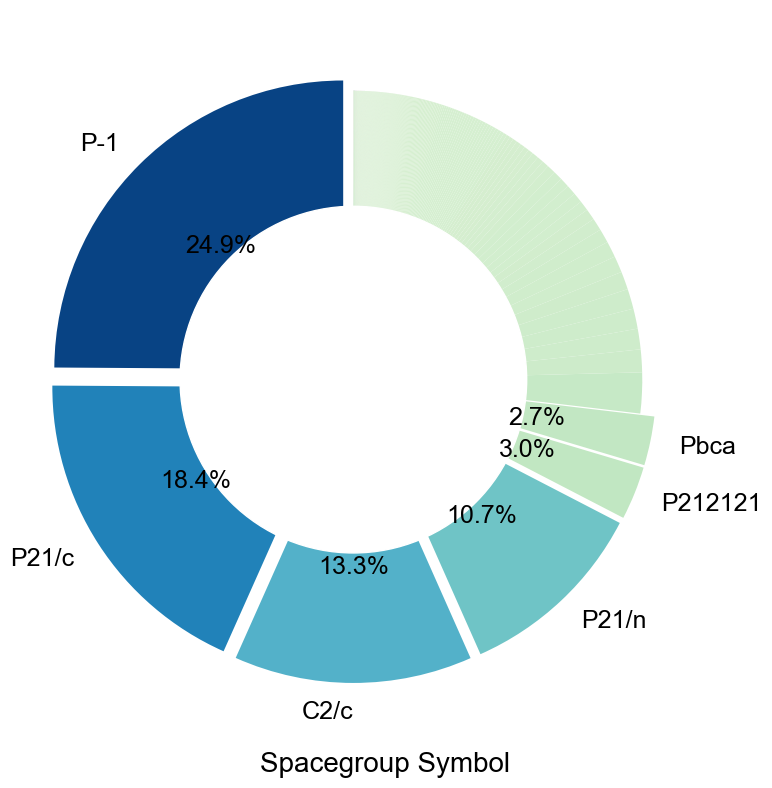

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap

# ------------------ 设置风格 ------------------ #
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.edgecolor": "black",
    "axes.linewidth": 1.0,
    "axes.facecolor": "white",
    "grid.color": "gray",
    "grid.alpha": 0.2,
    "grid.linestyle": "-",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.size": 12,
    "figure.facecolor": "white",
})
sns.set_context("notebook", font_scale=1.2)

# ------------------ 创建反色的渐变色调色板 ------------------ #
custom_colors = ["#084384", "#1373b2", "#42a6cb", "#77cac5", "#b2e1b9", "#d6efd0"]
# 创建连续调色板后反转颜色顺序
cmap = LinearSegmentedColormap.from_list("custom_GnBu", custom_colors, N=256).reversed()

# ------------------ 读取 Excel 数据 ------------------ #
file_path = "/Users/linzuhong/学习文件/3-博/博三/MOF_llm/statedemo/ccdc/Spacegroup_Symbol_stats.xlsx"
df = pd.read_excel(file_path)

# 假设有两列：["Spacegroup_Symbol", "Frequency"]
df = df.sort_values("Frequency", ascending=False)
categories = df["Spacegroup_Symbol"].values
values = df["Frequency"].values

# 计算总数，用于百分比判断
total = values.sum()

# ------------------ 定义只在 >=2.3% 时显示文本的函数 ------------------ #
def autopct_func(pct):
    return f"{pct:.1f}%" if pct >= 2.3 else ""

# ------------------ 构造 labels，只在 >=2.3% 时显示类别名 ------------------ #
labels = []
for cat, val in zip(categories, values):
    pct = (val / total) * 100
    if pct >= 2.3:
        labels.append(cat)
    else:
        labels.append("")

# ------------------ 计算每个扇区的 explode 参数 ------------------ #
# 将 explode 参数从 0.1 调整为 0.05，使得分离的间隔更窄
explode = [0.05 if (val / total * 100) >= 2.3 else 0 for val in values]

# ------------------ 使用新的 cmap 映射数值 -> 颜色 ------------------ #
norm = Normalize(vmin=values.min(), vmax=values.max())
pie_colors = [cmap(norm(v)) for v in values]

# ------------------ 绘制圆环图 ------------------ #
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    values,
    labels=labels,
    colors=pie_colors,
    startangle=90,
    autopct=autopct_func,
    explode=explode,             
    wedgeprops={"edgecolor": "none"}
)

# 添加中心白色圆形，形成圆环图（内圆半径可调，这里设置为 0.60）
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")  # 保持图形为圆形

# 调整文字大小
for txt in texts:
    txt.set_fontsize(18)
for autotxt in autotexts:
    autotxt.set_fontsize(18)

plt.tight_layout()

# 在图形下方添加标题
plt.figtext(0.5, 0.02, "Spacegroup Symbol", ha="center", fontsize=20)

# 保存为 PDF 文件
plt.savefig("/Users/linzuhong/学习文件/3-博/博三/MOF_llm/statedemo/pie.pdf", format="pdf", dpi=300)

plt.show()

# 元素

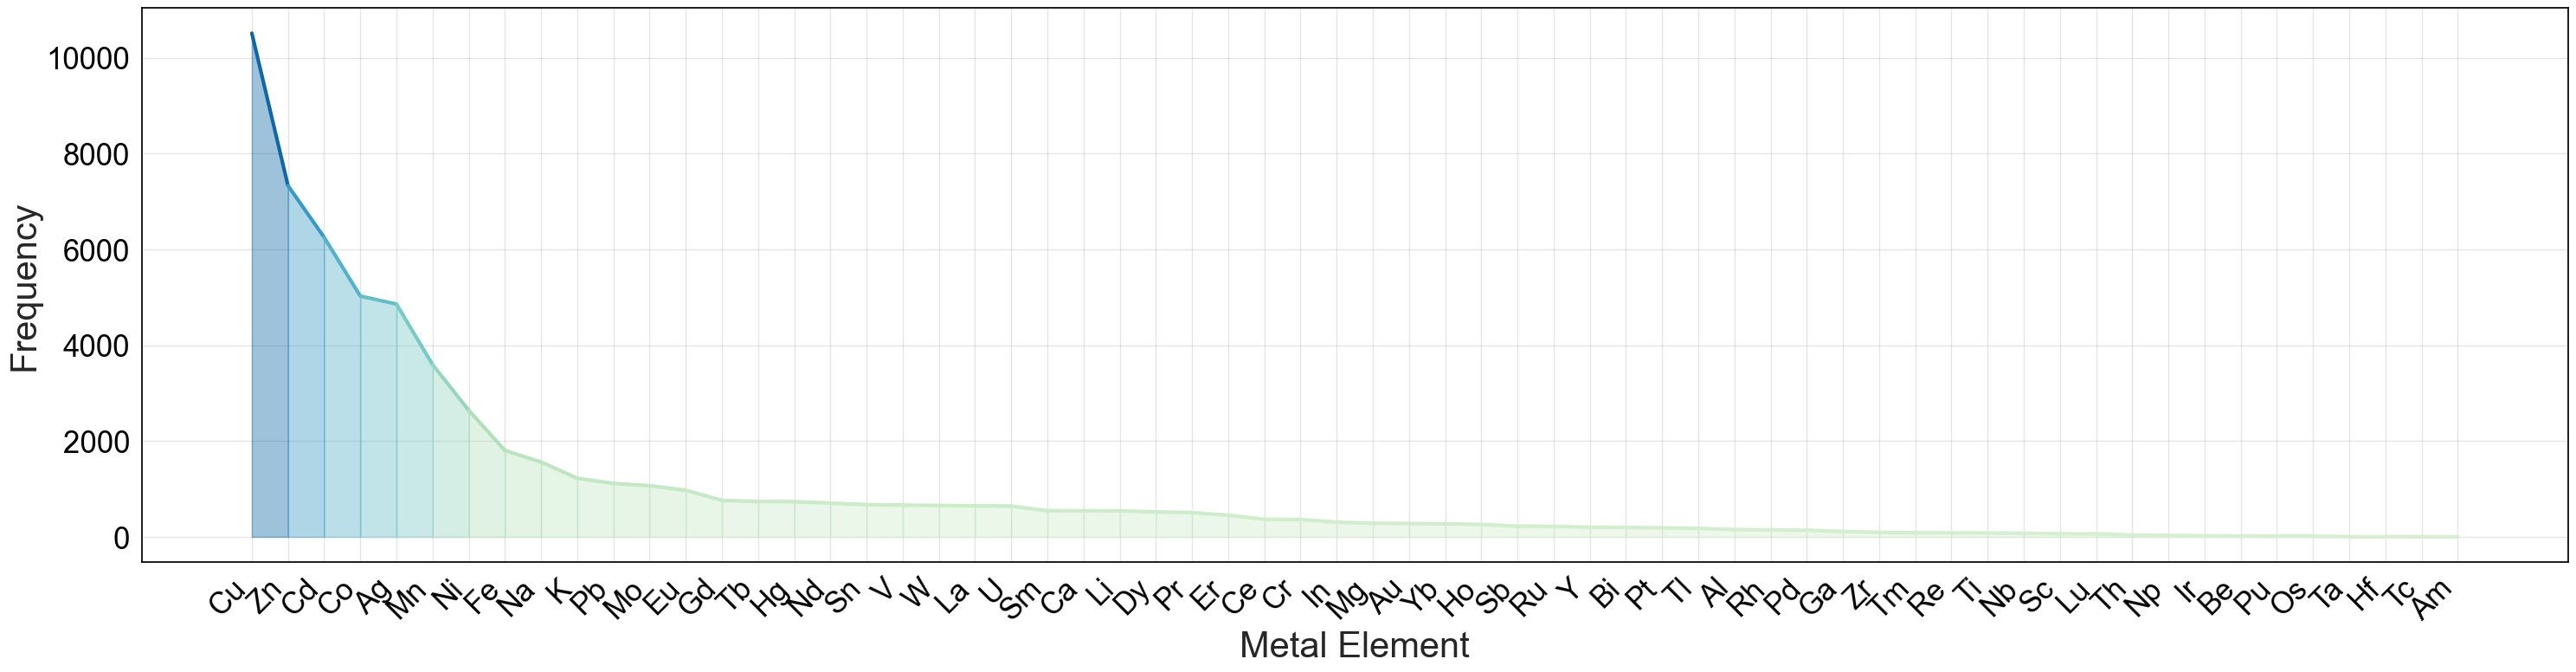

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap

# ------------------ 设置风格 ------------------ #
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.edgecolor": "black",
    "axes.linewidth": 1.0,
    "axes.facecolor": "white",
    "grid.color": "gray",
    "grid.alpha": 0.2,
    "grid.linestyle": "-",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.size": 12,
    "figure.facecolor": "white",
})
sns.set_context("notebook", font_scale=1.2)

# ------------------ 读取数据 ------------------ #
file_path = "/Users/linzuhong/学习文件/3-博/博三/MOF_llm/statedemo/ccdc/element_stats.xlsx"
df = pd.read_excel(file_path)

# 假设 Excel 中有两列："Element" 和 "Frequency"
df = df.sort_values("Frequency", ascending=False)
elements = df["Element"].values
frequencies = df["Frequency"].values

# ------------------ 生成 x 轴数值（数值索引） ------------------ #
x_positions = np.arange(len(elements))

# ------------------ 创建自定义颜色映射 ------------------ #
custom_colors = ["#084384", "#1373b2", "#42a6cb", "#77cac5", "#b2e1b9", "#d6efd0"]
# 创建连续调色板，然后反转
cmap = LinearSegmentedColormap.from_list("custom_GnBu", custom_colors, N=256).reversed()
norm = Normalize(vmin=frequencies.min(), vmax=frequencies.max())

# ------------------ 绘图 ------------------ #
fig, ax = plt.subplots(figsize=(30, 8))

# 循环绘制每个相邻点的线段和填充区域
for i in range(len(x_positions) - 1):
    xi = [x_positions[i], x_positions[i+1]]
    yi = [frequencies[i], frequencies[i+1]]
    # 使用两点的平均值决定该段颜色
    avg_val = (frequencies[i] + frequencies[i+1]) / 2.0
    color = cmap(norm(avg_val))
    ax.plot(xi, yi, color=color, linewidth=3)
    ax.fill_between(xi, yi, color=color, alpha=0.4)

# 设置坐标轴标签和标题
ax.set_xlabel("Metal Element", fontsize=30)
ax.set_ylabel("Frequency", fontsize=30)
ax.set_xticks(x_positions)
ax.set_xticklabels(elements, ha="right", fontsize=25, rotation=45)
ax.tick_params(axis='y', labelsize=25)
ax.tick_params(axis='x', labelsize=25)

plt.tight_layout()

# 保存为 PDF 文件
plt.savefig("/Users/linzuhong/学习文件/3-博/博三/MOF_llm/statedemo/element_stats_vertical_line.pdf",
            format="pdf", dpi=300)

plt.show()